In [1]:
from bs4 import BeautifulSoup
import requests
from matplotlib import pyplot as plt
import numpy as np
import math
import pickle
import string
from scipy.sparse import hstack
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
stop = stopwords.words('english')

In [2]:
import requests
from bs4 import BeautifulSoup

link = "https://www.flipkart.com/boult-w40-quad-mic-enc-48h-battery-life-low-latency-gaming-made-india-5-3v-bluetooth-gaming/p/itm1a8ec38afaf97?pid=ACCGXYXKXWPZMGMR&lid=LSTACCGXYXKXWPZMGMRGRKQTR&marketplace=FLIPKART&srno=b_1_1&otracker=browse&fm=organic&iid=en_hoeThnD0A5Xt5l-roPmzFB9lsu_IedDVBxCrB7T-MQM1hT01q1ftia70Zqo35QZxH4hXNFNXSRzpv9-pcws2ng%3D%3D&ppt=browse&ppn=browse"
# link = "https://www.flipkart.com/apple-iphone-15-black-128-gb/p/itm6ac6485515ae4?pid=MOBGTAGPTB3VS24W&lid=LSTMOBGTAGPTB3VS24WVZNSC6&marketplace=FLIPKART&q=iphone&store=tyy%2F4io&spotlightTagId=BestsellerId_tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=Search&iid=25a57b7f-4bf6-4891-8dd8-be541b7d9d92.MOBGTAGPTB3VS24W.SEARCH&ppt=sp&ppn=sp&ssid=ees1v7rrog0000001730139836292&qH=0b3f45b266a97d70"
# link="https://www.amazon.in/dp/B09G9HDcrid=2WW2L3P6UU9C5&dib=eyJ2IjoiMSJ9.OCoJgZ8ghdguKvc7Ozmt3OyY3JIh2zh_9fXQPStOsFy5Gz9e2PbRJTLGIEpMmwnd9CVu_0AItnBKvK-Pq77gJAGlvlx3e9LCxkoBYj-AnFwucWk8rO7vzCPYEx0vtRSqrp-9ZHIPhzwQjMDYvJLDxKU3_eYofWryI6oyDNBR9NqdE24JD7kQ6Pom11Z9GUFOdVoNvj_44EhFuz_Pv67eDtfnOdkbrxLtb-21_mpIJFE.Uv5YExEzvX3OP1UdOYyL5Tb8bXComK-ahT2aVAxlX4w&dib_tag=se&keywords=iphone&qid=1728323512&sprefix=ipho%2Caps%2C274&sr=8-1-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&th=1"
# link="https://www.flipkart.com/poco-m6-pro-5g-power-black-128-gb/p/itm5b122ff13027f?pid=MOBGRNZ3FX5XNR2T&lid=LSTMOBGRNZ3FX5XNR2TILGJYM&marketplace=FLIPKART&store=tyy%2F4io&srno=b_1_1&otracker=browse&fm=organic&iid=f316bee9-549f-43d3-b585-24db8ae5f062.MOBGRNZ3FX5XNR2T.SEARCH&ppt=hp&ppn=homepage&ssid=n0f0nk57dc0000001731150807726"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
    "Referer": "https://www.flipkart.com/",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
    "Connection": "keep-alive",
}

sourcecode = ""
try:
    sourcecode = requests.get(link, headers=headers).text
except:
    print("Link is invalid")


In [3]:
soup = None
if sourcecode=='':
    print("invalid link")
else:
    soup=BeautifulSoup(sourcecode)
    print(soup.prettify())




<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://rukminim2.flixcart.com" rel="preconnect"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/atlas.chunk.8dd48d.css" rel="stylesheet"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.c48a12.css" rel="stylesheet"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.1def6f.css" rel="stylesheet"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="102988293558" property="fb:page_id"/>
  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>
  <link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
  <meta content="website" property="og:type"/>

In [4]:
def findtotalreviewsFlipkart(soup):
    review_count_tag = soup.find("div", class_= "row j-aW8Z")
    num=review_count_tag.text.split()[0]
    ans=0
    for x in num:
        if x.isnumeric():
            ans=ans*10+int(x)
        if(x==' '):
            break
    return ans

def converttonumber ( num:str):
    n=0;
    for x in num:
        if x.isnumeric():
            n=n*10+int(x);
    return n;



def get_product_title(soup:BeautifulSoup)->str:
    title_tag=soup.find("span",class_="VU-ZEz")
    if title_tag==None:
        raise ValueError("cannot find product title ")
    name=title_tag.text
    return name.strip()
def get_product_price(soup:BeautifulSoup)->str:
    price_tag=soup.find("div",class_="Nx9bqj CxhGGd yKS4la")
    if price_tag==None:
        price_tag=soup.find("div",class_="Nx9bqj CxhGGd")
        if price_tag==None:
            raise ValueError("cannot find product price ")
    return converttonumber(price_tag.text)

In [5]:
print("title : ",get_product_title(soup))
print("price : ",get_product_price(soup))
print("total reviews ",findtotalreviewsFlipkart(soup))

title :  Boult W40 with Quad Mic ENC, 48H Battery Life, Low Latency Gaming, Made in India, 5.3v Bluetooth Gaming  (Electric Black, True Wireless)
price :  899
total reviews  104110


In [66]:

def findnumberofreviewsFlipkart(soup):        
    reviewstags= soup.find("ul",class_="+psZUR")
    reviewsnumber=reviewstags.find_all("li",class_="fQ-FC1")
    return [converttonumber(review.text) for review in reviewsnumber]

def findavgrating(total,percentages:list)->int:
    def findnumberofreviews(total,percent):
        return total*(percent/100);
    rating=0;
    n= len(percentages)
    if len(percentages)==0:
        print("no percentage found")
    for i,per in enumerate(percentages):
        rating=rating+(findnumberofreviews(total,per)*(n-i))/total
        
    return rating
    
def getAllRatingNumber(total, percentages):
    return [findnumberofreviewsFlipkart(total, p) for p in percentages]
def percentageconvertion(total:int,totalreviews:list):
    return [(x/total)*100 for x in totalreviews]


In [67]:
total=findtotalreviewsFlipkart(soup)
totalreviews=findnumberofreviewsFlipkart(soup)
percentagelist=percentageconvertion(total,totalreviews)

In [68]:
print(total)
print(totalreviews)
print(percentagelist)

205243
[161526, 25284, 5815, 3068, 9550]
[78.69988257821217, 12.319055948314924, 2.8332269553651037, 1.4948134650146412, 4.653021053093163]


In [69]:

def percentagePlot(labels:list,percentages:list):
    plt.figure(figsize=(10, 6))
    plt.grid(True)
    plt.bar(labels, percentages, color="skyblue")
    plt.xlabel("Stars")
    plt.ylabel("Percentage (%)")
    plt.title("Percentage Plot")
    plt.ylim(0, 100)
    plt.show()
    
    

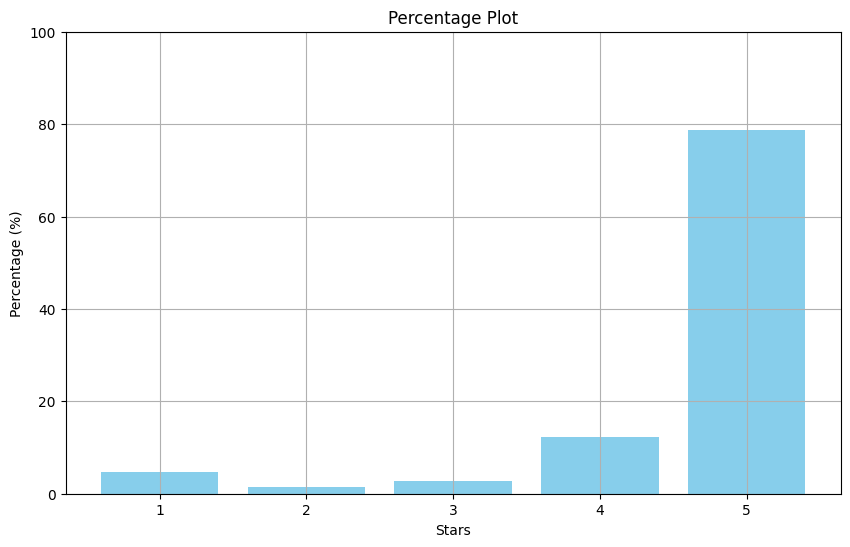

In [70]:
labels=[5,4,3,2,1]
percentagePlot(labels,percentagelist)

In [71]:
def globalPlot(labels:list,reviews:list):
    plt.figure(figsize=(10, 6))
    plt.bar(labels, reviews)
    plt.grid(True)
    plt.xlabel("Stars")
    plt.ylabel("Percentage (%)")
    plt.title("Percentage Plot")
    plt.ylim(0, math.ceil(max(reviews))*1.10)
    plt.show()


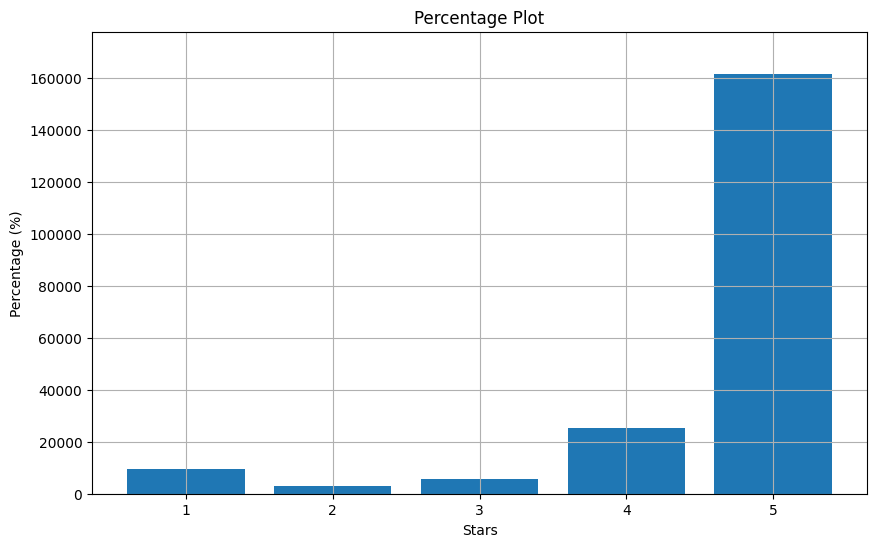

In [72]:
# labels 
labels=[5,4,3,2,1]
globalPlot(labels,totalreviews)

In [73]:
#  get helpfulness:
def getHelpFullFlipkart(soup):        
    return [converttonumber(x.text) for x in  soup.find_all("span",class_="tl9VpF")]
    
def getHelpFullnessFlipkart(soup):
    helpfull_list=getHelpFullFlipkart(soup)
    return [
        (helpfull_list[x] / (helpfull_list[x] + helpfull_list[x + 1]) * 100)
        if (helpfull_list[x] + helpfull_list[x + 1]) != 0
        else 0  # Return 0% if both helpful and total votes are zero
        for x in range(0, len(helpfull_list), 2)
    ]


In [74]:
helpful=getHelpFullnessFlipkart(soup)
helpful

[86.03603603603604,
 80.48684727129957,
 79.5892286627111,
 80.87941372418388,
 81.34160090191658,
 79.51584507042253,
 79.99520843315764,
 81.06060606060606,
 81.162259222984,
 81.53364632237871,
 75.54858934169279,
 70.76583210603829,
 70.58261700095511,
 71.06690777576854,
 80.64516129032258,
 74.4186046511628,
 72.78911564625851,
 68.4361549497848,
 75.0,
 84.0]

In [75]:
def getReviews(soup:BeautifulSoup):
    reviews=soup.find_all("div",class_="ZmyHeo")
    return [x.text for x in reviews]
    

In [76]:
reviewtext= getReviews(soup)

In [77]:
reviewtext

['Awesome 🔥🔥☺️READ MORE',
 'Just go for it.Amazing one.Beautiful camera with super fast processorREAD MORE',
 'High quality camera😍READ MORE',
 'Awesome photography experience. Battery backup is good . Display is much better than 14 version.READ MORE',
 'Very niceREAD MORE',
 'Nice product with all features specially its looks and camera battery backup is goodYou should buy it without any issuesREAD MORE',
 'Camera Quality Is Improved Loving ItREAD MORE',
 'Nice ❤️READ MORE',
 'Best mobile phoneCamera quality is very nice Battery backup is very good Sound quality is amazing.READ MORE',
 'Just loved the product , colour , design is wow and camera is amazing , just clicked first picture of my grandmother 👵🏻  in portrait mode and results r here in front of you guys 😍😘READ MORE']

In [78]:

model=None
vectorizer_review=None
tfidf_review=None
# Load the model
with open('picklefiles/logisticregression.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Load the vectorizers
with open('picklefiles/vectorizer_review.pkl', 'rb') as review_vec_file:
    vectorizer_review = pickle.load(review_vec_file)

# with open('vectorizer_summary.pkl', 'rb') as summary_vec_file:
#     vectorizer_summary = pickle.load(summary_vec_file)

# Load the TF-IDF vectorizers (if you used them)
with open('picklefiles/tfidf_review.pkl', 'rb') as tfidf_review_file:
    tfidf_review = pickle.load(tfidf_review_file)

# with open('tfidf_summary.pkl', 'rb') as tfidf_summary_file:
#     tfidf_summary = pickle.load(tfidf_summary_file)

# Load other transformers as needed


In [83]:
overall = findavgrating(total,percentagelist)
helpful=getHelpFullnessFlipkart(soup)
reviewstxt=getReviews(soup)


4.589179655335383


In [80]:
# function to convert to lower case :
def lowercase(str:[str])->[str]:
    return str.lower()
#  function to remove punctuations :
def removepunctuations(s: str) -> str:
    # Create translation table to replace punctuation with spaces
    translation_table = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    # Remove punctuation using the translation table
    return s.translate(translation_table)
#  function to remove punctuations :
def removestopwords(s: str, stop: set=stop) -> str:
    return ' '.join([word for word in s.split() if word not in stop])
# apply lemmatizer
def applylemmatizer(s:str)->[str]:
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(s) for s in s.split()])
# apply counter vector
def applycountvector(s: str, vectorizer: CountVectorizer) -> any:
    return vectorizer.transform([s])
# apply tfidf vector
def applyTFIDFvector(s: str, vectorizer: TfidfVectorizer) -> any:
    return vectorizer.transform([s])

# combined all  the parameters :
# def combineparameters (x_tfidf_review,x_cvec_review,x_tfidf_summary,x_cvec_summary):
#     return hstack([x_tfidf_review,x_cvec_review,x_tfidf_summary,x_cvec_summary])
def combineparameters (x_tfidf_review,x_cvec_review,):
    return hstack([x_tfidf_review,x_cvec_review])


def applydatapreprocessing(s:str,cvector:CountVectorizer,tfidf:TfidfVectorizer)->any:
    s=lowercase(s)
    s=removepunctuations(s)
    s=removestopwords(s)
    s=applylemmatizer(s)
    s_vec=applycountvector(s,cvector)
    s_tfidf=applyTFIDFvector(s,tfidf)
    return hstack([s_tfidf,s_vec])



In [81]:
def findmaxoccurences(outputs:list):
    pos=0;
    /neg=0;
    neu=0;
    for x in outputs:
        if x==1:
            pos+=1;
        if x==0:
            neu+=1;
        if x==-1:
            neg+=1;
    print(pos,neg,neu)
    if pos==0 and neg==0 and neu==0:
        return "not enough data found for analysis"
    if(pos>neg and pos>neu):
        return "positive" 
    elif(neg>pos and neg>neu):
        return "negative"
    else:
        return "neutral"

def findpredictions(model,inputs):
    return [model.predict(x) for x in inputs]
    

In [82]:
def model_predict(reviewstxt,helpful:list,vectorizer_review,tfidf_review):
    pre_processed_data=[applydatapreprocessing(x,vectorizer_review,tfidf_review) for x in reviewstxt]
    inputs=[hstack([overall,helpful[i],data]) for i,data in enumerate(pre_processed_data)]
    outputs=findpredictions(model,inputs)
    return findmaxoccurences(outputs)

model_predict(reviewstxt,helpful,vectorizer_review,tfidf_review)

10 0 0


'positive'